In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# read the copper.xlsx file using pandas 
data = pd.read_excel(r"C:\Users\Welcome\Downloads\Copper_Set.xlsx")

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
# check whether the data has null value
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
#check number of columns and rows
data.shape

(181673, 14)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [8]:
data = data.drop(['id'], axis=1)

In [9]:
clm_to_numeric = ["quantity tons", 'customer', "country", "application", "thickness", "width", "selling_price"]
data[clm_to_numeric] = data[clm_to_numeric].apply(pd.to_numeric, errors='coerce')

In [10]:
clm_to_datetime = ["item_date", "delivery date"]
for x in clm_to_datetime:
    data[x] = pd.to_datetime(data[x], format='%Y%m%d', errors='coerce').dt.date

In [11]:
data.loc[data["material_ref"].str.contains('0{10,}', na=False), 'material_ref'] = np.nan

In [12]:
data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,2020-07-01,601.00


In [13]:
data.isnull().sum()

item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [14]:
clm_mean_value = ['quantity tons', 'thickness', 'width', 'selling_price']
clm_mean = data[clm_mean_value].mean()
data[clm_mean_value] = data[clm_mean_value].fillna(clm_mean)

In [15]:
columns_fill_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
columns_modes = data[columns_fill_mode].mode().iloc[0]
data[columns_fill_mode] = data[columns_fill_mode].fillna(columns_modes)

In [16]:
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [17]:
data['country'] = data['country'].astype(np.int64)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  int64  
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181673 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


# Exploratory Data Analysis

In [19]:
eda = data.copy(True)

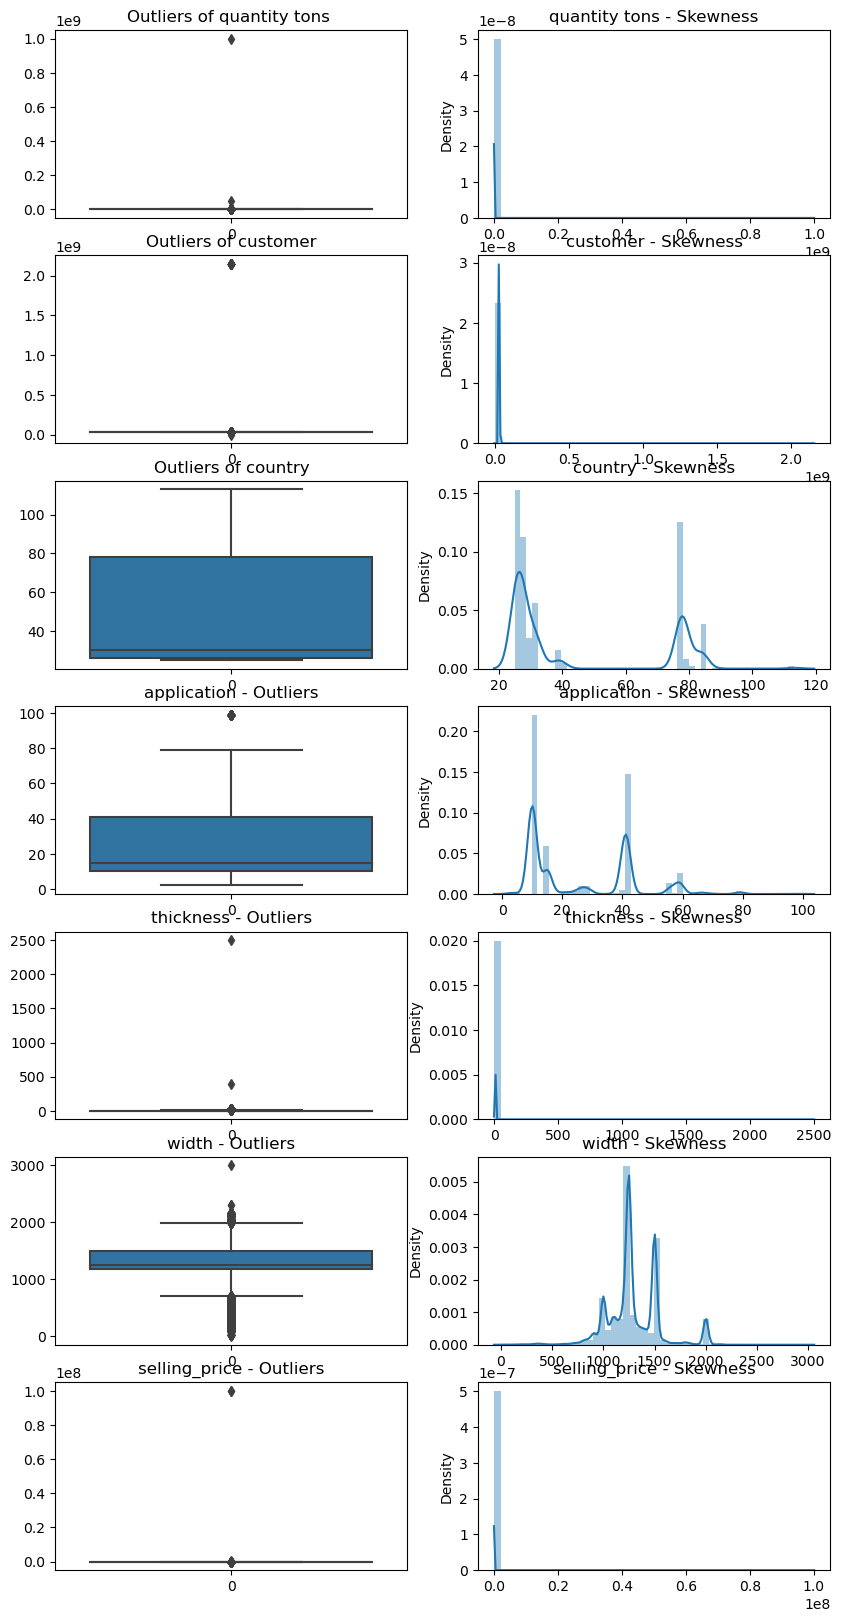

In [20]:
fig, axis = plt.subplots(7, 2, figsize=(10,20))
 
sb.boxplot(ax=axis[0, 0], data=eda['quantity tons'])      #quantity tons
axis[0, 0].set_title('Outliers of quantity tons ')
sb.distplot(ax=axis[0, 1], x=eda['quantity tons'])
axis[0, 1].set_title('quantity tons - Skewness')

sb.boxplot(ax=axis[1, 0], data=eda['customer'])      #customer
axis[1, 0].set_title('Outliers of customer')
sb.distplot(ax=axis[1, 1], x=eda['customer'])
axis[1, 1].set_title('customer - Skewness')

sb.boxplot(ax=axis[2, 0], data=eda['country'])      #country
axis[2, 0].set_title('Outliers of country')
sb.distplot(ax=axis[2, 1], x=eda['country'])
axis[2, 1].set_title('country - Skewness')

sb.boxplot(ax=axis[3, 0], data=eda['application'])      #application
axis[3, 0].set_title('application - Outliers')
sb.distplot(ax=axis[3, 1], x=eda['application'])
axis[3, 1].set_title('application - Skewness')

sb.boxplot(ax=axis[4, 0], data=eda['thickness'])      #thickness
axis[4, 0].set_title('thickness - Outliers')
sb.distplot(ax=axis[4, 1], x=eda['thickness'])
axis[4, 1].set_title('thickness - Skewness')

sb.boxplot(ax=axis[5, 0], data=eda['width'])      #width
axis[5, 0].set_title('width - Outliers')
sb.distplot(ax=axis[5, 1], x=eda['width'])
axis[5, 1].set_title('width - Skewness')

sb.boxplot(ax=axis[6, 0], data=eda['selling_price'])      #selling_price
axis[6, 0].set_title('selling_price - Outliers')
sb.distplot(ax=axis[6, 1], x=eda['selling_price'])
axis[6, 1].set_title('selling_price - Skewness')

plt.show()

In [21]:
skewed_data = eda.copy(True)

In [22]:
skewed_column = ['quantity tons', 'thickness', 'width', 'selling_price']

In [23]:
gh = skewed_data[skewed_data[skewed_column] <= 0] 

In [24]:
gh

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181671,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
gh = np.nan

In [26]:
skewed_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [27]:
skewed_data.dropna(inplace=True)

In [28]:
skewed_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [29]:
skewed_data.skew()

quantity tons    424.690816
customer          86.985308
country            0.753090
application        0.724555
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [30]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_outlier_treatment = skewed_data[outlier_columns].describe()

# removing outliers by IQR 
for column in outlier_columns:
    q1 = skewed_data[column].quantile(0.30)
    q3 = skewed_data[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    skewed_data = skewed_data[(skewed_data[column] >= lower_bound) & (skewed_data[column] <= upper_bound)]
    
# status after reving outliers
after_outlier_treatment = skewed_data[outlier_columns].describe()
# Before and after outlier treatment
print("summary statistics before outlier treatment :")
print(before_outlier_treatment)

print("summary statistics after outlier treatment :")
print(after_outlier_treatment)

summary statistics before outlier treatment :
       quantity tons      thickness          width  selling_price
count   1.816730e+05  181673.000000  181673.000000   1.816730e+05
mean    5.874926e+03       2.564827    1295.286724   1.918036e+03
std     2.349075e+06       6.572303     261.631754   3.317947e+05
min    -2.000000e+03       0.180000       1.000000  -1.160000e+03
25%     1.097037e+01       0.700000    1180.000000   6.690000e+02
50%     3.036499e+01       1.500000    1250.000000   8.120000e+02
75%     6.716130e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09    2500.000000    2990.000000   1.000010e+08
summary statistics after outlier treatment :
       quantity tons      thickness          width  selling_price
count  132610.000000  132610.000000  132610.000000  132610.000000
mean       35.586776       1.803292    1265.163823     840.957077
std        31.886657       1.441639     174.825123     189.087688
min       -18.000000       0.180000     855.000000 

# After Treating Outliers And Skewness

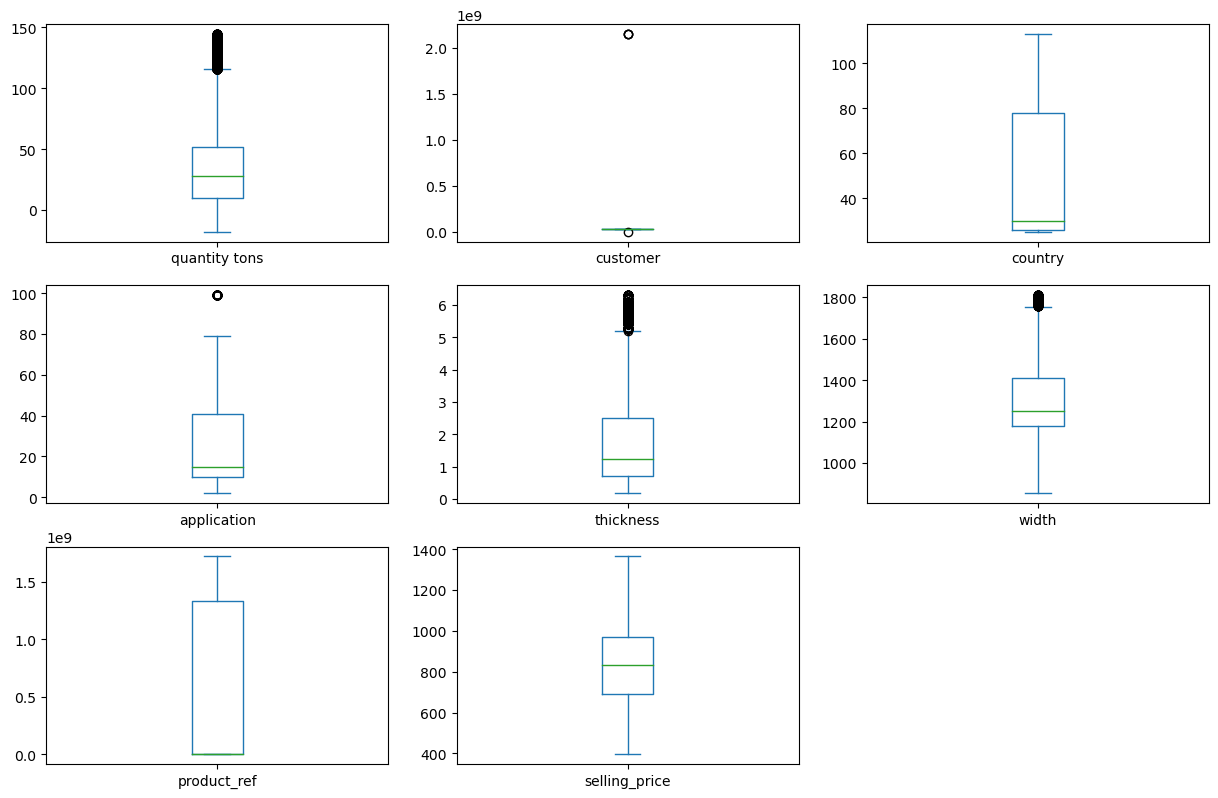

We can see there is no outliers in these data


In [31]:
skewed_data.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,13))
plt.show()
print("We can see there is no outliers in these data")

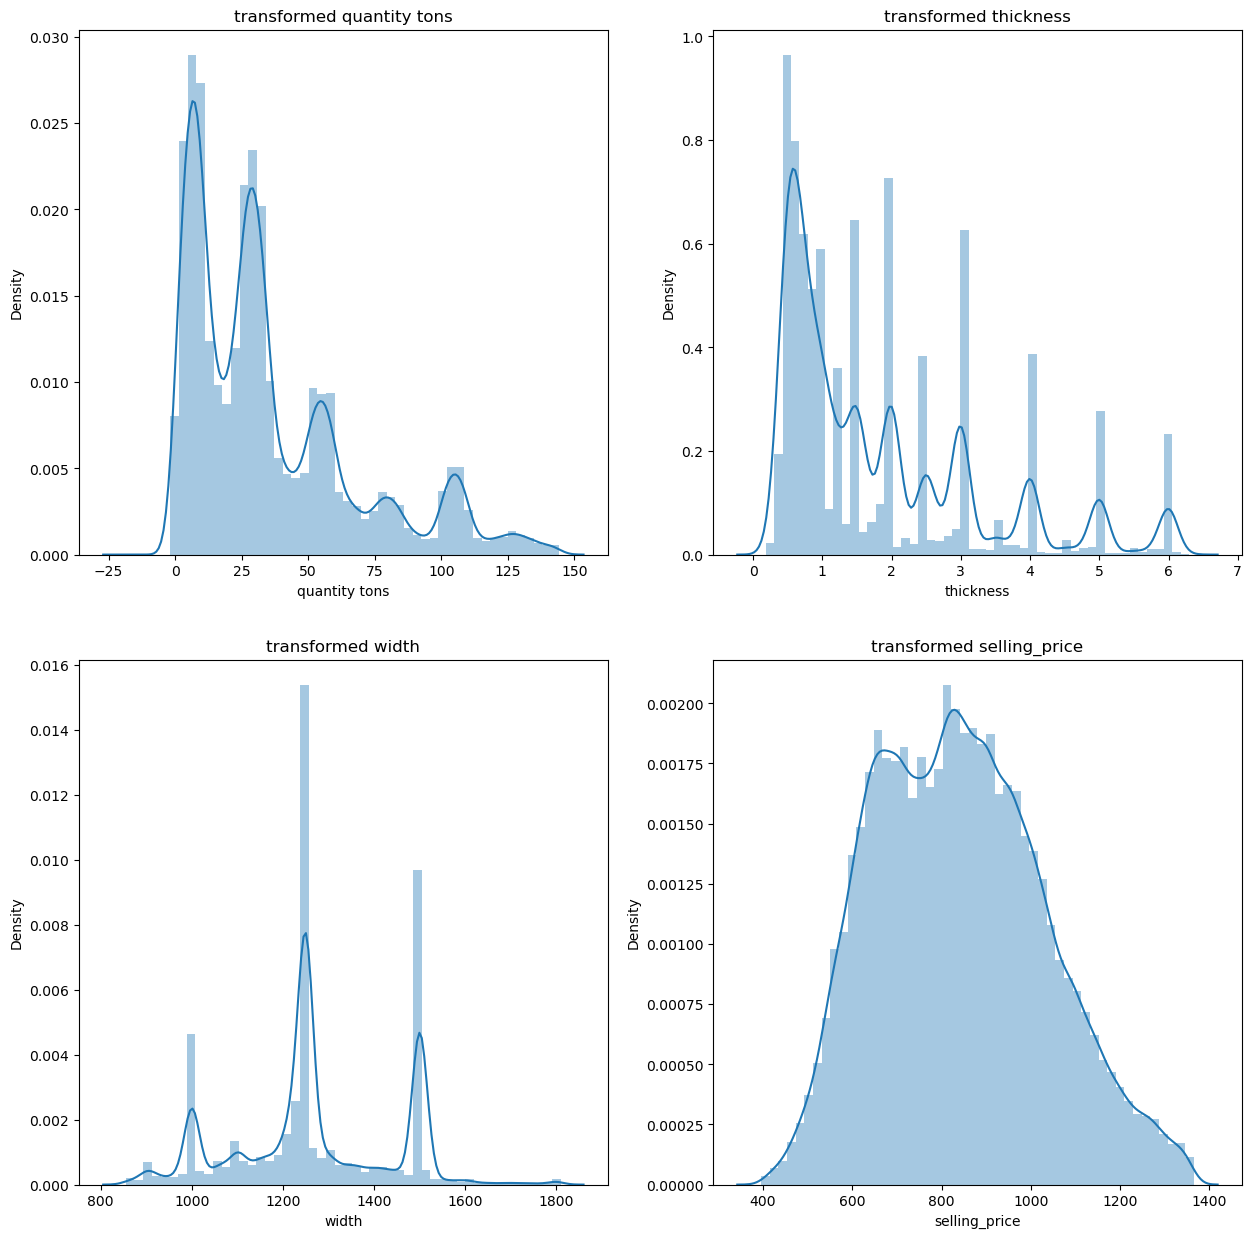

In [32]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
f, axis = plt.subplots(2, 2,  figsize=(15,15))
axis = axis.flatten()
for i, column in enumerate(outlier_columns):
    sb.distplot(skewed_data[column], kde=True, ax=axis[i])
    axis[i].set_title(f"transformed {column}")
    
plt.show()

In [33]:
skewed_data.skew()

quantity tons      1.239172
customer         210.204172
country            0.701002
application        0.685184
thickness          1.275959
width              0.057908
product_ref        0.983477
selling_price      0.308437
dtype: float64

In [34]:
#Here are some guidelines for interpreting skewness values:

#Skewness value close to 0: The distribution is approximately symmetrical.
#Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
#Skewness value less than -1 or greater than 1: The distribution is highly skewed.

# Feature Engineering

In [35]:
modify_data = skewed_data.copy(True)

In [36]:
modify_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132610 entries, 0 to 181670
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      132610 non-null  object 
 1   quantity tons  132610 non-null  float64
 2   customer       132610 non-null  float64
 3   country        132610 non-null  int64  
 4   status         132610 non-null  object 
 5   item type      132610 non-null  object 
 6   application    132610 non-null  float64
 7   thickness      132610 non-null  float64
 8   width          132610 non-null  float64
 9   material_ref   132610 non-null  object 
 10  product_ref    132610 non-null  int64  
 11  delivery date  132610 non-null  object 
 12  selling_price  132610 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 14.2+ MB


In [37]:
modify_data['timetaken for delivery'] = (modify_data['item_date']-modify_data['delivery date']).abs().dt.days

In [38]:
modify_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,timetaken for delivery
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
7,2021-04-01,113.387124,30342192.0,32,Won,W,41.0,0.68,1220.0,DX51D+Z,611993,2021-01-01,931.0,90
8,2021-04-01,69.071853,30341428.0,38,Won,S,10.0,0.60,1275.0,DX51D+Z,1668701376,2021-07-01,1363.0,91
11,2021-04-01,113.995666,30342192.0,32,Won,W,41.0,0.55,1220.0,DX51D+Z,611993,2021-01-01,954.0,90
12,2021-04-01,27.512545,30165529.0,78,Won,W,10.0,0.75,1250.0,DX51D+Z,164141591,2021-07-01,1098.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181665,2020-07-02,6.169226,30200854.0,25,Won,W,41.0,0.71,1300.0,DX51D+Z,164141591,2020-07-01,608.0,1
181666,2020-07-02,82.123794,30200854.0,25,Won,W,41.0,1.18,1220.0,DX51D+Z,164141591,2020-07-01,590.0,1
181667,2020-07-02,106.783299,30200854.0,25,Won,W,41.0,0.96,1240.0,DX51D+Z,164141591,2020-07-01,602.0,1
181668,2020-07-02,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,DX51D+Z,164141591,2020-07-01,591.0,1


# HEATMAP FOR VIEW CORELATION BETWEEN DATAS

In [39]:
y = modify_data[['quantity tons','customer','country','application','thickness','width','selling_price','product_ref','timetaken for delivery']].corr()

<AxesSubplot:>

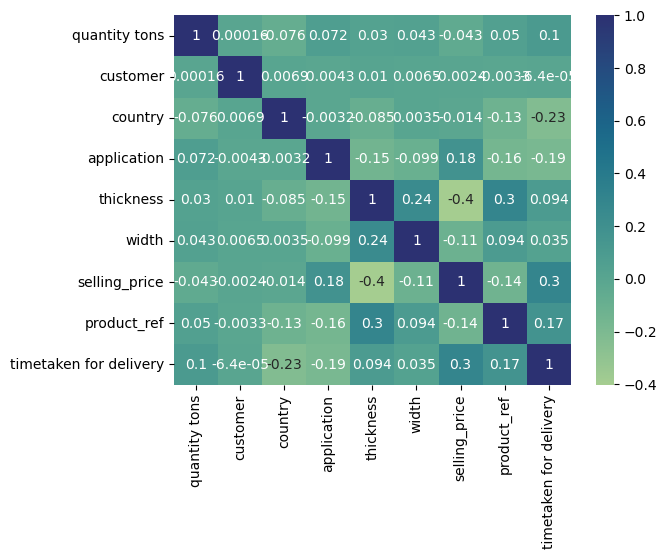

In [40]:
sb.heatmap(y, annot=True, cmap="crest")

# Finding Unique Value

In [41]:
modify_data['country'] = modify_data['country'].astype(str)
country = modify_data['country'].unique()
status = modify_data['status'].unique()
item = modify_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '32' '38' '78' '27' '30' '25' '77' '39' '40' '26' '84' '80' '79'
 '113' '89']
['Won' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful' 'Revised'
 'Offered' 'Offerable']
['W' 'S' 'Others' 'PL' 'WI' 'IPL']


# Encoding Categorical Column

In [42]:
encode = LabelEncoder()
encode_country = encode.fit(country)
transformed_country = encode_country.transform(country)

encode = LabelEncoder()
encode_status = encode.fit(status)
transformed_status = encode_status.transform(status)

encode = LabelEncoder()
encode_item = encode.fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)

[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]
[6 5 0 1 7 4 3 2]
[4 3 1 2 5 0]


In [43]:
for l, m in zip(item, transformed_item):
    print('before encoding  :',l, '------encoeded by :',m)

before encoding  : W ------encoeded by : 4
before encoding  : S ------encoeded by : 3
before encoding  : Others ------encoeded by : 1
before encoding  : PL ------encoeded by : 2
before encoding  : WI ------encoeded by : 5
before encoding  : IPL ------encoeded by : 0


In [44]:
import pickle

path1 = 'country.pkl'
path2 = 'status.pkl'
path3 = 'item.pkl'

with open(path1, 'wb') as file:
    pickle.dump(encode_country, file)
    
with open(path2, 'wb') as file:
    pickle.dump(encode_status, file)
    
with open(path3, 'wb') as file:
    pickle.dump(encode_item, file)

In [45]:
with open('item.pkl', 'rb') as file:
    encode_item = pickle.load(file)
    
transform_item = encode_item.transform(item)

# Regression Model For Finding Selling Price

In [46]:
categorical_column = ['status', 'item type', 'country']
encode = LabelEncoder()
for i in categorical_column:
    print(i)
    modify_data[i] = encode.fit_transform(modify_data[i])
    print(modify_data[i].unique())

status
[6 5 0 1 7 4 3 2]
item type
[4 3 1 2 5 0]
country
[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]


In [47]:
modify_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,timetaken for delivery
0,2021-04-01,54.151139,30156308.0,4,6,4,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
7,2021-04-01,113.387124,30342192.0,6,6,4,41.0,0.68,1220.0,DX51D+Z,611993,2021-01-01,931.0,90
8,2021-04-01,69.071853,30341428.0,7,6,3,10.0,0.60,1275.0,DX51D+Z,1668701376,2021-07-01,1363.0,91
11,2021-04-01,113.995666,30342192.0,6,6,4,41.0,0.55,1220.0,DX51D+Z,611993,2021-01-01,954.0,90
12,2021-04-01,27.512545,30165529.0,11,6,4,10.0,0.75,1250.0,DX51D+Z,164141591,2021-07-01,1098.0,91


In [48]:
X = modify_data[['quantity tons', 'thickness', 'width','country','status','item type','application','product_ref','timetaken for delivery']].values
Y = modify_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#Split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [49]:
path4 = 'Stdscaling.pkl'

with open(path4, 'wb') as file:
    pickle.dump(scaler, file)
print(f'pickle file created :',path4)

pickle file created : Stdscaling.pkl


In [50]:
# ExtraTraeesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X_train, Y_train)
etr_predict = etr_model.predict(X_test)
etr_mse = mean_squared_error(Y_test, etr_predict)
etr_mae = mean_absolute_error(Y_test, etr_predict)
etr_r2 = r2_score(Y_test, etr_predict)

# XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)
xgb_predict = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(Y_test, xgb_predict)
xgb_mae = mean_absolute_error(Y_test, xgb_predict)
xgb_r2 = r2_score(Y_test, xgb_predict)

# DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, Y_train)
dtr_predict = dtr_model.predict(X_test)
dtr_mse = mean_squared_error(Y_test, dtr_predict)
dtr_mae = mean_absolute_error(Y_test, dtr_predict)
dtr_r2 = r2_score(Y_test, dtr_predict)

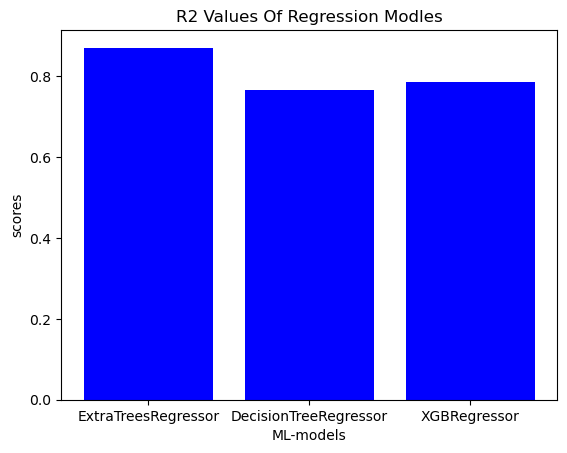

FINDING BEST FIT MODEL BASED ON R_2 SCORE
ExtraTreesRegressor 0.8700709022772939
DecisionTreeRegressor 0.764670786574961
XGBRegressor 0.7844990071486687

 Modle ExtraTreesRegressor produce maximum R_2 score : 0.8700709022772939


In [51]:
models = ['ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
scores = [etr_r2, dtr_r2, xgb_r2]

plt.bar(models, scores, color='blue')
plt.xlabel('ML-models')
plt.ylabel('scores')
plt.title('R2 Values Of Regression Modles')

plt.show()

print("FINDING BEST FIT MODEL BASED ON R_2 SCORE")
max_score = max(scores)
max_model = ""

for model, score in zip(models, scores):
    print(model, score)
    if score == max_score:
        max_model = model
print(f'\n Modle {max_model} produce maximum R_2 score : {max_score}')

In [52]:
et_model = etr_model.fit(X_train, Y_train)

In [53]:
path5 = "extraTreesRegressor.pkl"

with open(path5, 'wb') as file:
    pickle.dump(et_model, file)
    
print(path5)

extraTreesRegressor.pkl


In [ ]:
quantity = input('Enter quantity :')
thickness = input('Enter thickness :')
width = input('Enter width :')

new_sample1 = input('Enter a country :')
c = ''
for i, j in zip(country, transformed_country):
    if new_sample1 == i:
        c = j
        break
    else:
        print('Invalid country value')
        exit()

new_sample2 = input('Enter a status :')
s  = ''
for i, j in zip(status, transformed_status):
    if new_sample2 == i:
        s = j
        break
    else:
        print('Invalid status value')
        exit()

new_sample3 = input('Enter a item type :')
i = ''
for i, j in zip(item, transformed_item):
    if new_sample3 == i:
        i = j
        break
    else:
        print('Invalid item value')
        exit()

Z = [quantity, thickness, width, c, s, i, 41.0, 1670798778, 91]
Z = np.array(Z).reshape(1,-1)
price_pred = scaler.transform(Z)
price = etr_model.predict(price_pred)
print('predicted selling price :', price)

In [ ]:
s

In [ ]:
X = modify_data[['quantity tons', 'thickness', 'width','country','status','item type','application','product_ref','timetaken for delivery']].values
Y = modify_data[['status']].values

class_scaler = StandardScaler().fit(X)
X = class_scaler.transform(X)

# spliting Dataset into Traning And Testing
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.3, random_state=30)

In [ ]:
path6 = "scaler_classification.pkl"

with open(path6, 'wb') as file:
    pickle.dump(class_scaler, file)
    
print(f"Pickle file created : {path6}")

In [ ]:
# RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, Y_train)
rfc_predict = rfc_model.predict(X_test)
rfc_accuracy = accuracy_score(Y_test, rfc_predict)

# XGBclssifier
xgb_cmodel = xgb.XGBClassifier()
xgb_cmodel.fit(X_train, Y_train)
xgb_predicts = xgb_cmodel.predict(X_test)
xgb_accuracy = accuracy_score(Y_test, xgb_predicts)

# SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_predict = svm_model.predict(X_test)
svc_accuracy = accuracy_score(Y_test, svm_predict)

In [ ]:
models = ['RandomForestClassifier', 'XGBClassifier', 'SVM']
scores = [rfc_accuracy, xgb_accuracy, svc_accuracy]

plt.barh(models, scores, color='red')
plt.xlabel('Scores')
plt.ylabel('ML-models')
plt.title('R_2 values of Classification Models')
plt.show()

print("FINDING BEST FIT MODEL BASED ON R_2 SCORE")
max_score = max(scores)
max_model = ""

for model, score in zip(models, scores):
    print(model, score)
    if score == max_score:
        max_model = model
        
print(f'\n {max_model} produce maximum R_2 score : {max_score}')

In [ ]:
rf_model = rfc_model.fit(X_train, Y_train)

In [ ]:
path6 = "RandomForestClassifier.pkl"

with open(path6, 'wb') as file:
    pickle.dump(rf_model, file)
    
print(f'Pickle file created : {path6}')

In [ ]:
quantity = input("Enter quantity :")
thickness = input("enter thickness :")
width = input("Enter width :")
selling_price = input("Enter selling price :")

sample1 = input("enter country :")
c = ''
for i, j in zip(country, transformed_country):
    if sample1 == i:
        c = j
        break
    else:
        print("Invalid country value")
        exit()
        
sample3 = input("Enter item :")
it = ''
for i, j in zip(item, transformed_item):
    if sample3 == i:
        it = j
        break
        print("Invalid item value")
        exit()
        
X = [quantity, thickness, width, selling_price, c, it, 41.0, 1670798778, 91]
X = np.array(X).reshape(1, -1)  # change into 2D Array
new_pred = class_scaler.transform(X)
status_pred = xgb_cmodel.predict(new_pred)

if status_pred == 6:
    print("Won")
else:
    print("Lost")